# LitPop class

This class is a data model of economic exposure. It models countries' gridded exposure by interpolating an macroeconomic indicator through the product of night light intensities and gridded population count for a specific year. Asset value is distributed to the grid proportzional to LitPop. LitPop at each pixel is calculated in the script as:

$Lit^mPop^n = Lit^m * Pop^n$, with $exponents = [m, n] \in \N_0$ (Default values are $m=n=1$).

The night light images used are the following:
- year 2012 and 2016: https://earthobservatory.nasa.gov/Features/NightLights (15 arcsec resolution (~500m))

The gridded population count data used are the following:
- Gridded Population of the World (GPW), v4: Population Count, v4.10 (2000, 2005, 2010, 2015, 2020)
http://sedac.ciesin.org/data/set/gpw-v4-population-count-rev10
The population data from GWP needs to be downloaded manually as TIFF from this site and placed in the system data folder of climada, i.e.: climada_python/data/system/gpw_v4_population_count_rev10_2015_30_sec.tif
Always the GPW file of the year closest to the target year is required.
All other required data is acquired automatically.

Available macroeconomic indicators can be selected via the variable fin_mode:
- 'pc': produced capital (Source: World Bank DataBank), incl. manufactured or built assets such as machinery, equipment, and physical structures (pc is in constant 2014 USD, data is available for the years 1995, 2000, 2005, 2010, 2014). The pc-data is stored in the subfolder *data/system/Wealth-Accounts_CSV/*. Source: https://datacatalog.worldbank.org/dataset/wealth-accounting
- 'gdp': gross-domestic product (Source: World Bank)
- 'income_group': gdp multiplied by country's income group+1
- 'nfw': households' non-financial wealth (Source: Credit Suisse, of households only)
- 'tw': households' total wealth (Source: Credit Suisse, of households only)

Regarding the GDP (nominal GDP at current USD) and income group values, they are obtained from the [World Bank](https://data.worldbank.org) using the [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) API. If a value is missing, the value of the closest year is considered. When no values are provided from the World Bank, we use the [Natural Earth](https://www.naturalearthdata.com) repository values.

The `LitPop` class inherits from the [`Exposures`](climada_entity_Exposures.ipynb#Exposures-class) class. It provides a `set_country()` method which enables to model a country using different settings. The first time a night light image is used, it is downloaded and stored locally. This might take some time. 


In [28]:
# Import required packages:
import numpy as np
import pandas as pd
from matplotlib import colors
from iso3166 import countries as iso_cntry

from climada.entity.exposures.litpop import LitPop

## Country Exposure
In the following, we will create exposure data sets and plots for a variety of countries, comparing different settings.
### Default Settings

In [29]:
# Initiate a default LitPop exposure entity for Switzerland (ISO3-Code 'CHE'):
ent = LitPop()
ent.set_country('CHE')

""" In case you encounter an error here, because the GPW data is missing: The gridded population count data used are the following:
- Gridded Population of the World (GPW), v4: Population Count, v4.10 (2000, 2005, 2010, 2015, 2020).
http://sedac.ciesin.org/data/set/gpw-v4-population-count-rev10
The population data from GWP needs to be downloaded manually as TIFF
from this site and placed in the system data folder of climada,
i.e.: climada_python/data/system/gpw_v4_population_count_rev10_2015_30_sec.tif
"""

2019-03-07 16:06:49,743 - climada.entity.exposures.litpop - INFO - Generating LitPop data at a resolution of 30.0 arcsec.
2019-03-07 16:06:49,744 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (1 files) in folder /Users/eberenzs/Documents/Projects/climada_python/data/system
2019-03-07 16:06:49,745 - climada.entity.exposures.litpop - DEBUG - Reading and cropping neccessary BM files.
2019-03-07 16:06:49,746 - climada.entity.exposures.litpop - DEBUG - Trying to import the file /Users/eberenzs/Documents/Projects/climada_python/data/system/BlackMarble_2016_C1_geo_gray.tif.
2019-03-07 16:06:52,384 - climada.entity.exposures.litpop - DEBUG - Reading file completed: /Users/eberenzs/Documents/Projects/climada_python/data/system/BlackMarble_2016_C1_geo_gray.tif.
2019-03-07 16:06:52,384 - climada.entity.exposures.litpop - DEBUG - Resizing image according to chosen resolution
2019-03-07 16:07:02,701 - climada.entity.exposures.litpop - DEBUG - Cutting the bounding

' In case you encounter an error here, because the GPW data is missing: The gridded population count data used are the following:\n- Gridded Population of the World (GPW), v4: Population Count, v4.10 (2000, 2005, 2010, 2015, 2020).\nhttp://sedac.ciesin.org/data/set/gpw-v4-population-count-rev10\nThe population data from GWP needs to be downloaded manually as TIFF\nfrom this site and placed in the system data folder of climada,\ni.e.: climada_python/data/system/gpw_v4_population_count_rev10_2015_30_sec.tif\n'

### Plotting
The exposure entity was initiated using the default setting, i.e. a resolution of 30 arcsec and produced capital 'pc' as total asset value, using the exponents $[1, 1]$.

If the init worked, we can now plot a map of Switzerland's exposure.
We can get a good impression of the exposure distribution in Switzerland by comparing plots with linear and log-normal colormaps:

(please refer to the exposure tutorial *climada_entity_Exposures.ipynb* for more info on the visualization of exposure data.)

2019-03-07 16:07:20,048 - climada.entity.exposures.base - INFO - Setting geometry attribute.


(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x1a28b90710>]],
       dtype=object))

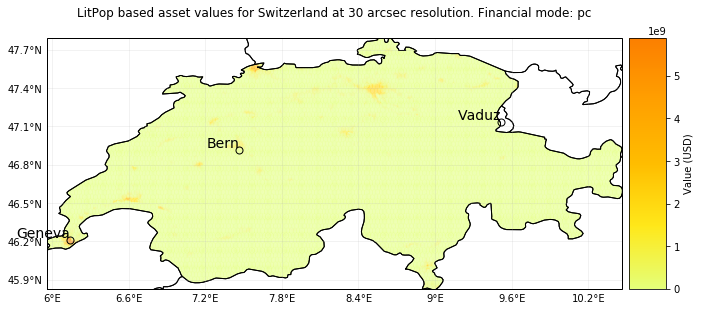

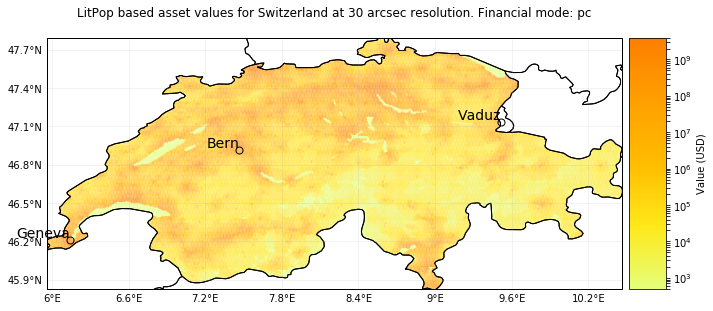

In [30]:
ent.set_geometry_points()
# plot exposure with linear colormap and major towns (pop_name=True):
ent.plot_hexbin(pop_name=True)
# plot exposure with log-normal colormap:
norm=colors.LogNorm(vmin=500, vmax=4.0e9)
ent.plot_hexbin(norm=norm)

### Settings: fin_mode
Instead on produced capital, we can also downscale other available macroeconomic indicators as estimates of asset value.
The indicator can be set via the variable fin_mode:

    'pc': produced capital (Source: World Bank DataBank), incl. manufactured or built assets such as machinery, equipment, and physical structures (pc is in constant 2014-USD, data available for the years 1995, 2000, 2005, 2010, 2014)
    'gdp': gross-domestic product (Source: World Bank)
    'income_group': gdp multiplied by country's income group+1
    'nfw': households' non-financial wealth (Source: Credit Suisse, of households only)
    'tw': households' total wealth (Source: Credit Suisse, of households only)
    
Let's initiate the entity for Switzerland with the financial mode "income_group":

2019-03-07 16:07:44,368 - climada.entity.exposures.litpop - INFO - Generating LitPop data at a resolution of 30.0 arcsec.
2019-03-07 16:07:44,369 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (1 files) in folder /Users/eberenzs/Documents/Projects/climada_python/data/system
2019-03-07 16:07:44,370 - climada.entity.exposures.litpop - DEBUG - Reading and cropping neccessary BM files.
2019-03-07 16:07:44,370 - climada.entity.exposures.litpop - DEBUG - Trying to import the file /Users/eberenzs/Documents/Projects/climada_python/data/system/BlackMarble_2016_C1_geo_gray.tif.
2019-03-07 16:07:46,924 - climada.entity.exposures.litpop - DEBUG - Reading file completed: /Users/eberenzs/Documents/Projects/climada_python/data/system/BlackMarble_2016_C1_geo_gray.tif.
2019-03-07 16:07:46,925 - climada.entity.exposures.litpop - DEBUG - Resizing image according to chosen resolution
2019-03-07 16:07:56,866 - climada.entity.exposures.litpop - DEBUG - Cutting the bounding

(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x1a6d9939b0>]],
       dtype=object))

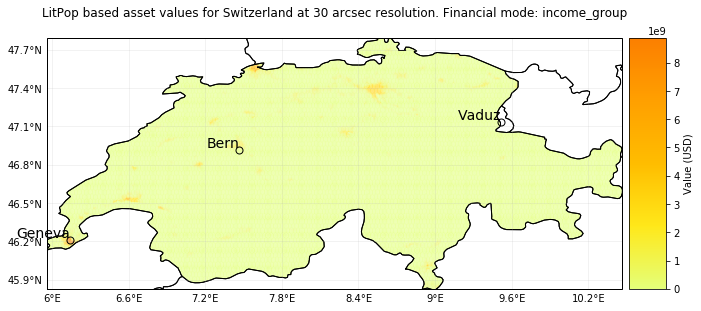

In [31]:
# Initiate a default LitPop exposure entity for Switzerland (ISO3-Code 'CHE'):

ent = LitPop()
ent.set_country('CHE', fin_mode='income_group') # try other fin_modes: 'gdp', 'nfw', 'pc'
# plot exposure:
ent.plot_hexbin(pop_name=True)

This map shows like the default one above, the only difference is the absolute value per pixel: Note that the range of the color scale has changed because the total asset value estimated with the income_group mode is larger than produced capital stock.

### Settings: resolution (res_arcsec) and reference_year

We can also change the resolution in arc seconds to one of these values: 30, 60, 120, 300, 600, 3600.

$30 arcsec \approx 1 km$.

$3600 arcsec = 1\degree \approx 110 km$.

Additionally, we can change the year our exposure is supposed to represent. For this, nightlight and population data  are used that are closest to the requested years. Macroeconomic indicators like produced capital are interpolated from available data or scaled proportional to GDP.

Let's estimate a produced capital exposure map for Switzerland in 2017 with a resolution of 300 arcsec:

2019-03-07 16:08:27,703 - climada.entity.exposures.litpop - INFO - Generating LitPop data at a resolution of 300 arcsec.
2019-03-07 16:08:27,704 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (1 files) in folder /Users/eberenzs/Documents/Projects/climada_python/data/system
2019-03-07 16:08:27,704 - climada.entity.exposures.litpop - DEBUG - Reading and cropping neccessary BM files.
2019-03-07 16:08:27,706 - climada.entity.exposures.litpop - DEBUG - Trying to import the file /Users/eberenzs/Documents/Projects/climada_python/data/system/BlackMarble_2016_C1_geo_gray.tif.
2019-03-07 16:08:30,375 - climada.entity.exposures.litpop - DEBUG - Reading file completed: /Users/eberenzs/Documents/Projects/climada_python/data/system/BlackMarble_2016_C1_geo_gray.tif.
2019-03-07 16:08:30,375 - climada.entity.exposures.litpop - DEBUG - Resizing image according to chosen resolution
2019-03-07 16:08:30,822 - climada.entity.exposures.litpop - DEBUG - Cutting the bounding 

(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x1a6d9c86d8>]],
       dtype=object))

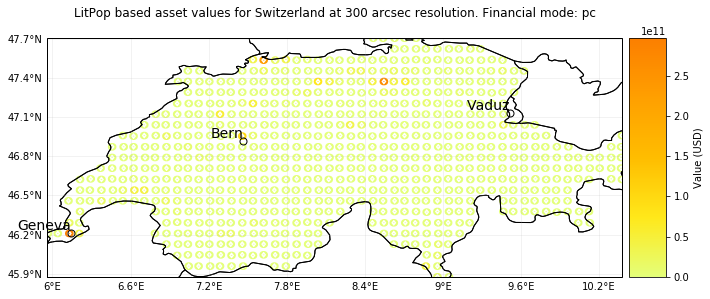

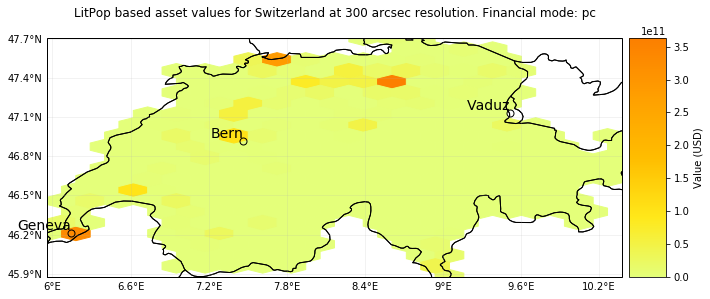

In [32]:
ent = LitPop()
ent.set_country('CHE', fin_mode='pc', res_arcsec=300, reference_year=2017)
ent.set_geometry_points()
# plot exposure with larger line width for better visibility:
ent.plot_hexbin(linewidth=7)
# Instead of linewight, the gridsize can be adjusted for better visibility (low values --> big markers).
# Warning: If gridsize is changed, the plot doesn't reflect the actual data's grid anymore,
# (please refer to the exposure tutorial *climada_entity_Exposures.ipynb* 
# for more info on the visualization of exposure data.)
ent.plot_hexbin(gridsize=20)

As can you can read from the logger output above the plot, the following data time steps were used to estimate 2017's exposure:
- GPW Population of 2015 (closest year)
- BlackMarble Nightlights of 2016 (closest year)
- Produced capital of 2014 (closest year), inflated proportional to the GDP increase from 2014 to 2017. This is an inflation of roughly 4.5% in this case.


### Settings: exponents of $Lit^mPop^n$

LitPop per pixel is the product of the exponents of nightlights+1 (Lit) and Population count (Pop).

$Lit^mPop^n = Lit^m * Pop^n$, with $exponents = [m, n] \in \N_0$ (Default values are $m=n=1$).

We can also change m and n.

**For countries with badly resolved population data (i.e. Jamaica or Uzbekistan), it can make sense to use nightlights only, i.e. an high exponent of Lit instead of LitPop.** 
Note that if Pop is not used, $Lit = nightlights$ instead of $nightlights+1$.

Let's compare exposure maps for $LitPop=Lit^1Pop^1$ (default); $Lit^3$; and $Pop^1$ Jamaica at a resolution of 60 arcsec.

Please execute one cell after the other:


'Lit^0 * Pop^1'

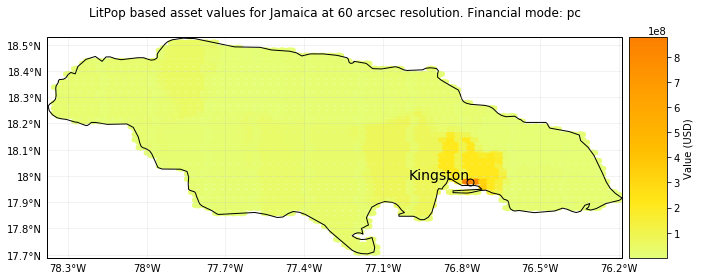

In [88]:
ent = LitPop()
res = 60
country = 'JAM' # Try different countries, i.e. 'JAM', 'CHE', 'RWA', 'MEX'
markersize = 3
gridsize = 70
buffer_deg=.04
# The arguments 'exponent' is used to set the power with which Lit and Pop go into LitPop:
ent.set_country(country, res_arcsec=res, reference_year=2014, exponents=[0, 1])  # Population only
ent.set_geometry_points()
ent.plot_hexbin(gridsize = gridsize, linewidth=markersize, buffer=buffer_deg)
# note: buffer_deg adds a buffer around the plotted data to show the whole country
"""Lit^0 * Pop^1"""

2019-02-14 14:40:47,263 - climada.entity.exposures.litpop - INFO - Generating LitPop data at a resolution of 60 arcsec.
2019-02-14 14:40:47,264 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (1 files) in folder /Users/eberenzs/Documents/Projects/climada_python/data/system
2019-02-14 14:40:47,265 - climada.entity.exposures.litpop - DEBUG - Reading and cropping neccessary BM files.
2019-02-14 14:40:47,266 - climada.entity.exposures.litpop - DEBUG - Trying to import the file /Users/eberenzs/Documents/Projects/climada_python/data/system/BlackMarble_2016_B1_geo_gray.tif.
2019-02-14 14:40:49,573 - climada.entity.exposures.litpop - DEBUG - Reading file completed: /Users/eberenzs/Documents/Projects/climada_python/data/system/BlackMarble_2016_B1_geo_gray.tif.
2019-02-14 14:40:49,574 - climada.entity.exposures.litpop - DEBUG - Resizing image according to chosen resolution
2019-02-14 14:40:53,307 - climada.entity.exposures.litpop - DEBUG - Cutting the bounding b

'Lit^3'

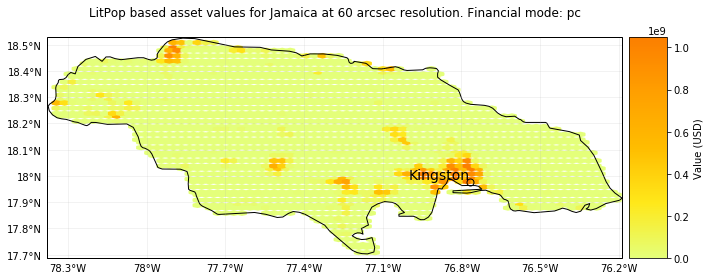

In [72]:
# JAMAICA:
ent.set_country(country, res_arcsec=res, reference_year=2014, exponents=[3, 0]) # Nightlights^3 only
ent.set_geometry_points()
ent.plot_hexbin(gridsize = gridsize, linewidth=markersize, buffer=buffer_deg)
"""Lit^3"""

2019-02-14 14:41:25,060 - climada.entity.exposures.litpop - INFO - Generating LitPop data at a resolution of 60 arcsec.
2019-02-14 14:41:25,060 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (1 files) in folder /Users/eberenzs/Documents/Projects/climada_python/data/system
2019-02-14 14:41:25,061 - climada.entity.exposures.litpop - DEBUG - Reading and cropping neccessary BM files.
2019-02-14 14:41:25,061 - climada.entity.exposures.litpop - DEBUG - Trying to import the file /Users/eberenzs/Documents/Projects/climada_python/data/system/BlackMarble_2016_B1_geo_gray.tif.
2019-02-14 14:41:27,322 - climada.entity.exposures.litpop - DEBUG - Reading file completed: /Users/eberenzs/Documents/Projects/climada_python/data/system/BlackMarble_2016_B1_geo_gray.tif.
2019-02-14 14:41:27,323 - climada.entity.exposures.litpop - DEBUG - Resizing image according to chosen resolution
2019-02-14 14:41:31,109 - climada.entity.exposures.litpop - DEBUG - Cutting the bounding b

'Lit^1 * Pop^1'

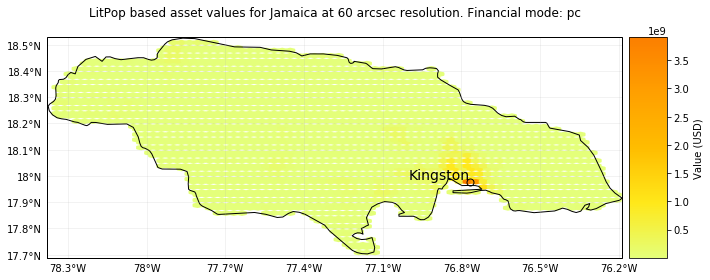

In [73]:
ent.set_country(country, res_arcsec=res, reference_year=2014, exponents=[1, 1]) # Default LitPop [1, 1]
ent.set_geometry_points()
ent.plot_hexbin(gridsize = gridsize, linewidth=markersize, buffer=buffer_deg)
"""Lit^1 * Pop^1"""

For **Switzerland**, population is resolved on the 3rd administrative level, with 2538 distinct geographical units. Therefore, the purely population-based map is highly resolved.

For **Jamaica**, population is only resolved on the 1st administrative level, with only 14 distinct geographical units. Therefore, the purely population-based map shows large monotonous patches. Still, the combination of Lit and Pop results in a concentration of asset value estimates around the capital city Kingston.

### Multiple countries
Computing LitPop-entities for a list of countries and plot a log-normal exposure map:

In [33]:
# Initiate GDP-Entity for Tanzania, Rwanda, and Burundi:
ent = LitPop()
countries_list = ['BDI', 'RWA', 'TZA']
ent.set_country(countries_list, res_arcsec=120, reference_year=2014, fin_mode='gdp')
ent.set_geometry_points()

2019-03-07 16:09:34,298 - climada.entity.exposures.litpop - INFO - Generating LitPop data at a resolution of 120 arcsec.
2019-03-07 16:09:34,299 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (1 files) in folder /Users/eberenzs/Documents/Projects/climada_python/data/system
2019-03-07 16:09:34,300 - climada.entity.exposures.litpop - DEBUG - Reading and cropping neccessary BM files.
2019-03-07 16:09:34,300 - climada.entity.exposures.litpop - DEBUG - Trying to import the file /Users/eberenzs/Documents/Projects/climada_python/data/system/BlackMarble_2016_C2_geo_gray.tif.
2019-03-07 16:09:36,553 - climada.entity.exposures.litpop - DEBUG - Reading file completed: /Users/eberenzs/Documents/Projects/climada_python/data/system/BlackMarble_2016_C2_geo_gray.tif.
2019-03-07 16:09:36,554 - climada.entity.exposures.litpop - DEBUG - Resizing image according to chosen resolution
2019-03-07 16:09:38,222 - climada.entity.exposures.litpop - DEBUG - Cutting the bounding 

'GDP downscaling with LitPop for Tanzania, Rwanda, and Burundi (2014)'

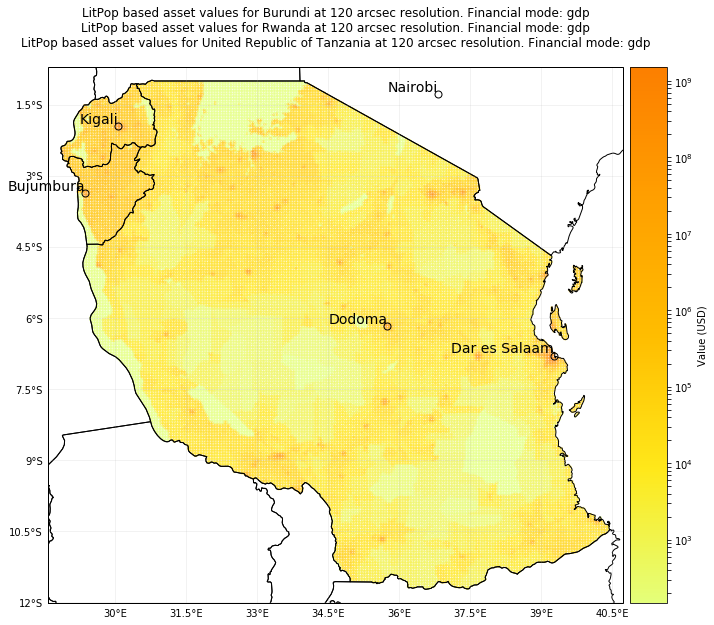

In [35]:
# Plot GDP-Entity for Tanzania, Rwanda, and Burundi:
# ent.plot_hexbin(linewidth=2, buffer=.3) # plot using linear colormap
# ent.plot_hexbin(linewidth=2, buffer=.3, bins='log') # plot using logarithmic colormap
norm=colors.LogNorm(vmin=1.5e2, vmax=1.5e9) # setting range for the log-normal scale
ent.plot_hexbin(linewidth=2, buffer=.3, norm=norm) # log-normal colormap from USD 150 to USD 1'500'000'000.
"""GDP downscaling with LitPop for Tanzania, Rwanda, and Burundi (2014)"""

## Sub-national (admin-1) GDP as intermediate downscaling layer <a class="anchor" id="admin1"></a>

In order to improve downscaling for countries with large regional differences within, a subnational breakdown of GDP can be used as an intermediate downscaling layer wherever available.

The sub-national (admin-1) GDP-breakdown needs to be added manually as a ".xls"-file to the folder *data/system/GSDP/* in the CLIMADA-directory. Currently, such data is provided for more than 10 countries, including USA, India, and China.

The xls-file requires at least the following columns (with names specified in row 1):
- State_Province: Names of admin-1 regions, i.e. states, cantons, provinces. Names need to match the naming of admin-1 shapes in the data used by the python package *cartopy.io* (c.f. *shapereader.natural_earth(name='admin_1_states_provinces')*)
- GSDP_ref: value of sub-national GDP to be used (absolute or relative values)
- Postal (optional): Alternative identifier of region, if names do not match wioth cartopy. Needs to correspond to the Postal-identifiers used in the shapereader of *cartopy.io*.

Please note that while admin1-GDP will per definition improve the downscaling of *GDP*, it might not neccessarily improve the downscaling quality for other asset bases like produced capital (pc).

*How To:*

The intermediadte downscaling layer can be activated with the option *admin1_calc*.

The option *adm1_scatter* produces a scatter plot to compare the modelled and observed GDP per admin-1 region.

In [19]:
# Initiate GDP-Entity for Switzerland, with and without admin1_calc:

ent_adm0 = LitPop()
ent_adm0.set_country('CHE', res_arcsec=30, fin_mode='gdp', admin1_calc=False)
ent_adm0.set_geometry_points()

ent_adm1 = LitPop()
ent_adm1.set_country('CHE', res_arcsec=30, fin_mode='gdp', admin1_calc=True)

ent_adm0.check()
ent_adm0.set_geometry_points()
ent_adm1.check()
ent_adm1.set_geometry_points()
print('Done.')

2019-03-07 15:59:27,701 - climada.entity.exposures.litpop - INFO - Generating LitPop data at a resolution of 30 arcsec.
2019-03-07 15:59:27,702 - climada.entity.exposures.nightlight - DEBUG - Found all required satellite data (1 files) in folder /Users/eberenzs/Documents/Projects/climada_python/data/system
2019-03-07 15:59:27,703 - climada.entity.exposures.litpop - DEBUG - Reading and cropping neccessary BM files.
2019-03-07 15:59:27,703 - climada.entity.exposures.litpop - DEBUG - Trying to import the file /Users/eberenzs/Documents/Projects/climada_python/data/system/BlackMarble_2016_C1_geo_gray.tif.
2019-03-07 15:59:30,193 - climada.entity.exposures.litpop - DEBUG - Reading file completed: /Users/eberenzs/Documents/Projects/climada_python/data/system/BlackMarble_2016_C1_geo_gray.tif.
2019-03-07 15:59:30,194 - climada.entity.exposures.litpop - DEBUG - Resizing image according to chosen resolution
2019-03-07 15:59:41,294 - climada.entity.exposures.litpop - DEBUG - Cutting the bounding b

2019-03-07 16:00:23,460 - climada.entity.exposures.litpop - DEBUG - Caclulating admin1 for Solothurn.
2019-03-07 16:00:23,461 - climada.entity.exposures.litpop - DEBUG - Extracting subshapes and detecting enclaves...
2019-03-07 16:00:23,462 - climada.entity.exposures.litpop - DEBUG - Detected subshapes: 3
2019-03-07 16:00:23,462 - climada.entity.exposures.litpop - DEBUG - of which detected enclaves: 0
2019-03-07 16:00:23,481 - climada.entity.exposures.litpop - DEBUG - Successfully isolated coordinates from shape
2019-03-07 16:00:23,833 - climada.entity.exposures.litpop - DEBUG - Caclulating admin1 for Jura.
2019-03-07 16:00:23,834 - climada.entity.exposures.litpop - DEBUG - Extracting subshapes and detecting enclaves...
2019-03-07 16:00:23,840 - climada.entity.exposures.litpop - DEBUG - Successfully isolated coordinates from shape
2019-03-07 16:00:24,107 - climada.entity.exposures.litpop - DEBUG - Caclulating admin1 for Genève.
2019-03-07 16:00:24,107 - climada.entity.exposures.litpop 

admin-0: First figure
admin-1: Second figure


'Note the small differences in eastern Switzerland.'

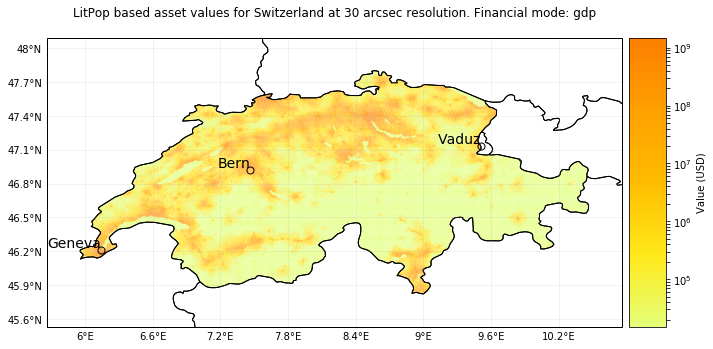

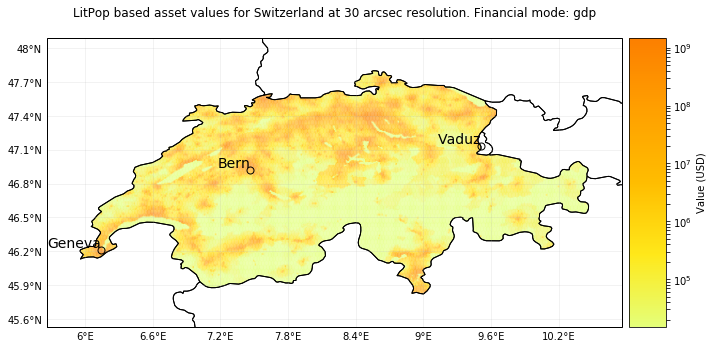

In [26]:
# Plotting:
norm=colors.LogNorm(vmin=1.5e4, vmax=1.5e9) # setting range for the log-normal scale
ent_adm0.plot_hexbin(buffer=.3, norm=norm)
ent_adm1.plot_hexbin(buffer=.3, norm=norm)
print('admin-0: First figure')
print('admin-1: Second figure')
'''Note the small differences in eastern Switzerland.'''

## Export Exposure Data to CSV <a class="anchor" id="export"></a>

The method ent.to_csv() can be used to export any CLIMADA exposure entity to a CSV-file.

Please refer to the exposure tutorial *climada_entity_Exposures.ipynb* for more info on the export of exposure data!


In [5]:
# Export LitPop based entity to CSV:
# set output path:
import os
from climada.util.constants import DATA_DIR # default CLIMADA-data directory
output_path = os.path.join(DATA_DIR, 'export') # subfolder export
if not os.path.isdir(output_path): # create output folder if it does not exist
    os.mkdir(output_path)
# set output file path:
output_path = os.path.join(output_path, 'LitPop_Exposure_Burundi_Tanzania_Rwanda.csv')
# Export data:
ent.to_csv(output_path, sep=',')

# display('Exposure entity exported to' + output_path)

# Note that the variable "region_id" in the exported CSV file is a number identifying the country, i.e.:
display('Examples for region_id:')
display('Burundi: ' + str(iso_cntry.get('BDI').numeric))
display('Tanzania: ' + str(iso_cntry.get('TZA').numeric))
display('Rwanda: ' + str(iso_cntry.get('RWA').numeric))


'Examples for region_id:'

'Burundi: 108'

'Tanzania: 834'

'Rwanda: 646'